In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio
import astropy.coordinates
import astropy.time
import time
import astropy.io.fits as fits
import glob
import tqdm

## Noise Off

In [2]:
files_off = glob.glob('../Data/celestial_pole-noiseoff_*.fits')
#files
data_noise_off = {}
for filename in files_off:
    d_off = fits.open(filename)
    header = dict(d_off[0].header)
    d_off_avg = np.mean([d_off[j].data['auto0_real'] for j in range(1,21)], axis=0)
    data_noise_off[(int(header['L']), int(header['B']))] = d_off_avg

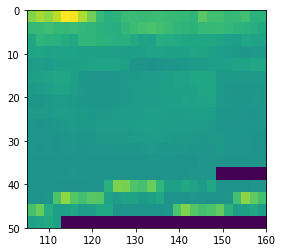

In [3]:
Ls = list(set([key[0] for key in data_noise_off.keys()]))
Bs = list(set([key[1] for key in data_noise_off.keys()]))
Ls.sort()
Bs.sort()
grid = np.zeros((len(Ls),len(Bs)))
Ls = np.array(Ls)
Bs = np.array(Bs)

plt.figure()
for (L,B), spec in data_noise_off.items(): #items gives you the keys and the values
    grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
plt.imshow(grid, extent=[105,160,50,0])

## Noise On

In [4]:
data_noise_on = {}
files_on = glob.glob('../Data/celestial_pole-noiseon_*.fits')

for filename in files_on:
    d_on = fits.open(filename)
    header = dict(d_on[0].header)
    d_on_avg = np.mean([d_on[j].data['auto0_real'] for j in range(1,3)], axis=0)
    data_noise_on[(int(header['L']), int(header['B']))] = d_on_avg
    
#data_noise_on
Ls = list(set([key[0] for key in data_noise_on.keys()]))
Bs = list(set([key[1] for key in data_noise_off.keys()]))
Ls.sort()
Bs.sort()
grid = np.zeros((len(Ls),len(Bs)))
Ls = np.array(Ls)
Bs = np.array(Bs)

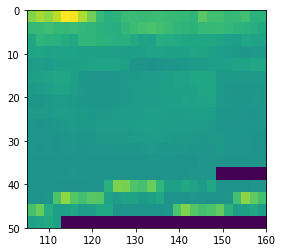

In [5]:
plt.figure()
for (L,B), spec in data_noise_off.items(): #items gives you the keys and the values
    grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
plt.imshow(grid, extent=[105,160,50,0])

In [6]:
# make x axis
data_noise_off_example = fits.open('../Data/celestial_pole-noiseoff_' + str(0) + '.fits')

In [7]:
hdr = dict(data_noise_off_example[0].header)
if_freq = 144 + np.arange(0, hdr['NCHAN']) * hdr['RES'] / 1e6
rf_freq = if_freq + 2*635

<IPython.core.display.Javascript object>


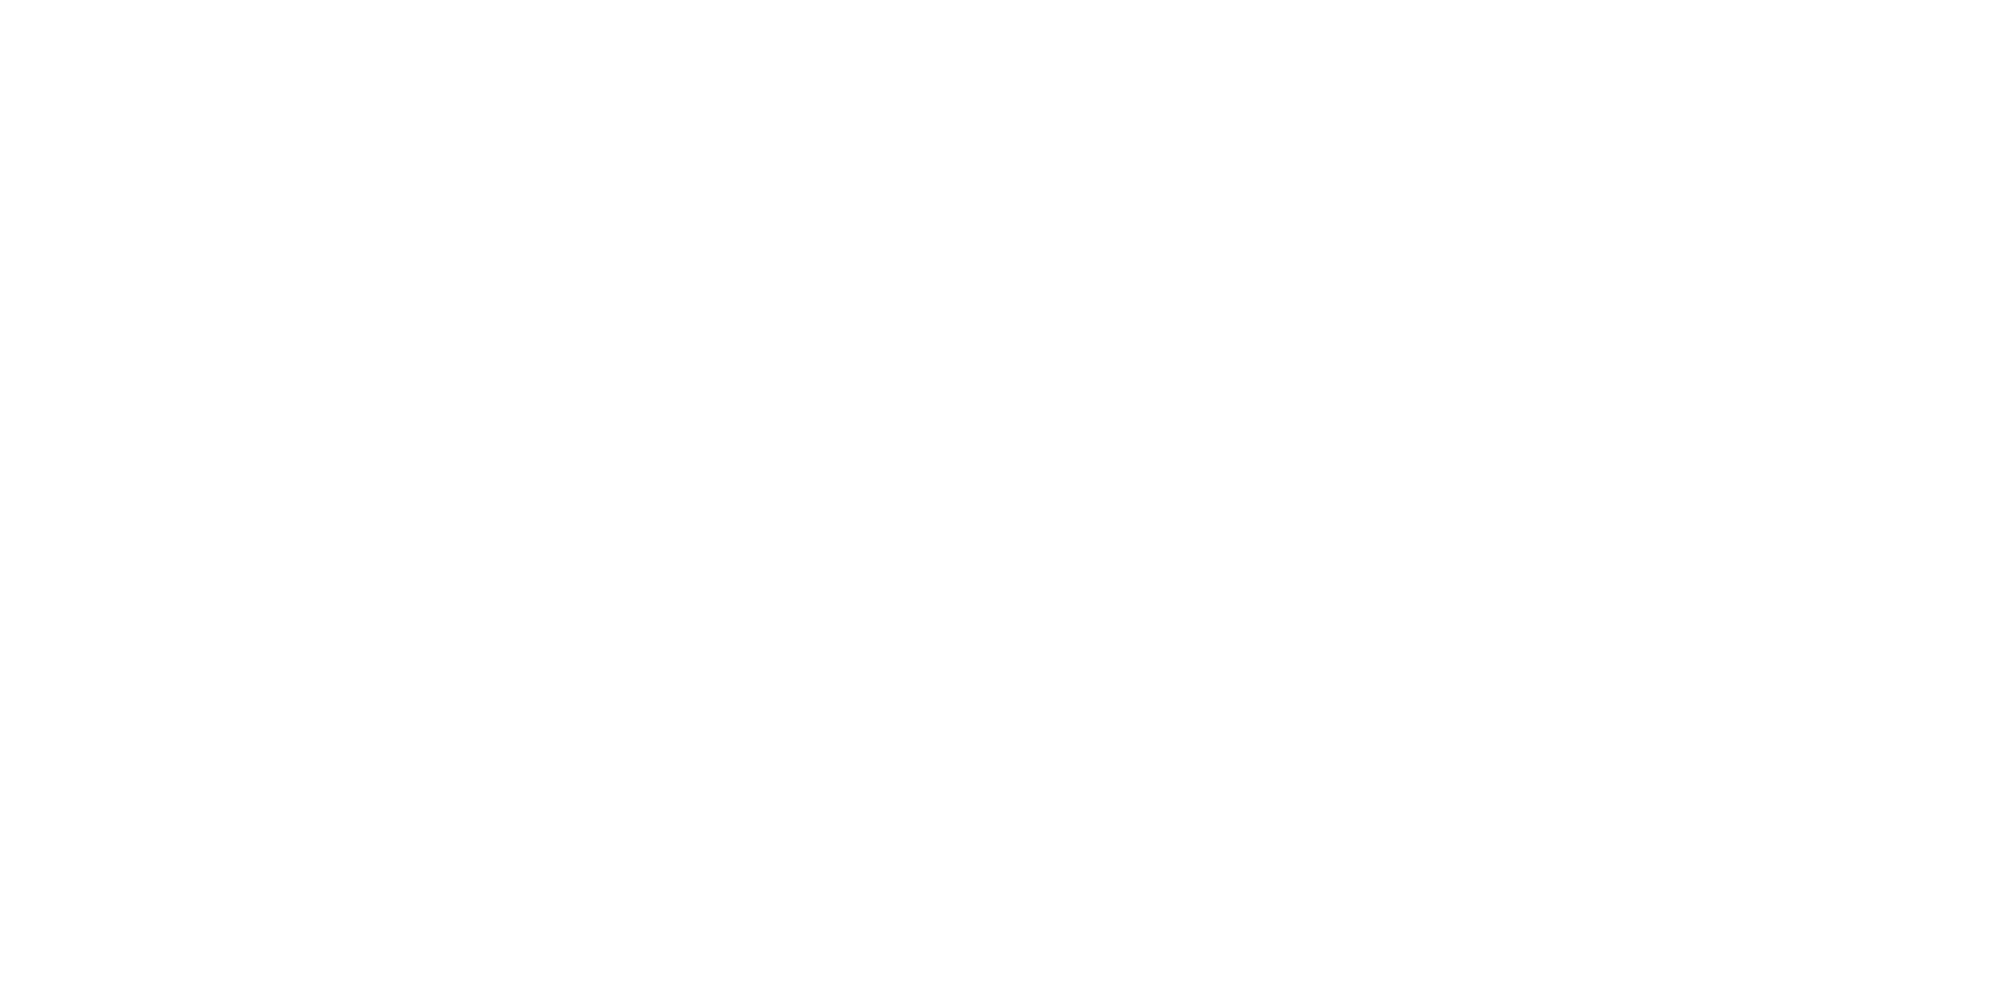

In [8]:
%matplotlib notebook
plt.figure(figsize=(10,5))

#for i in range(0,len(data_noise_off)):
for j in data_noise_off:
    plt.plot(rf_freq, data_noise_off[j])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise Off Power Spectra of North Celestial Pole', fontsize=15)
plt.legend()

<IPython.core.display.Javascript object>


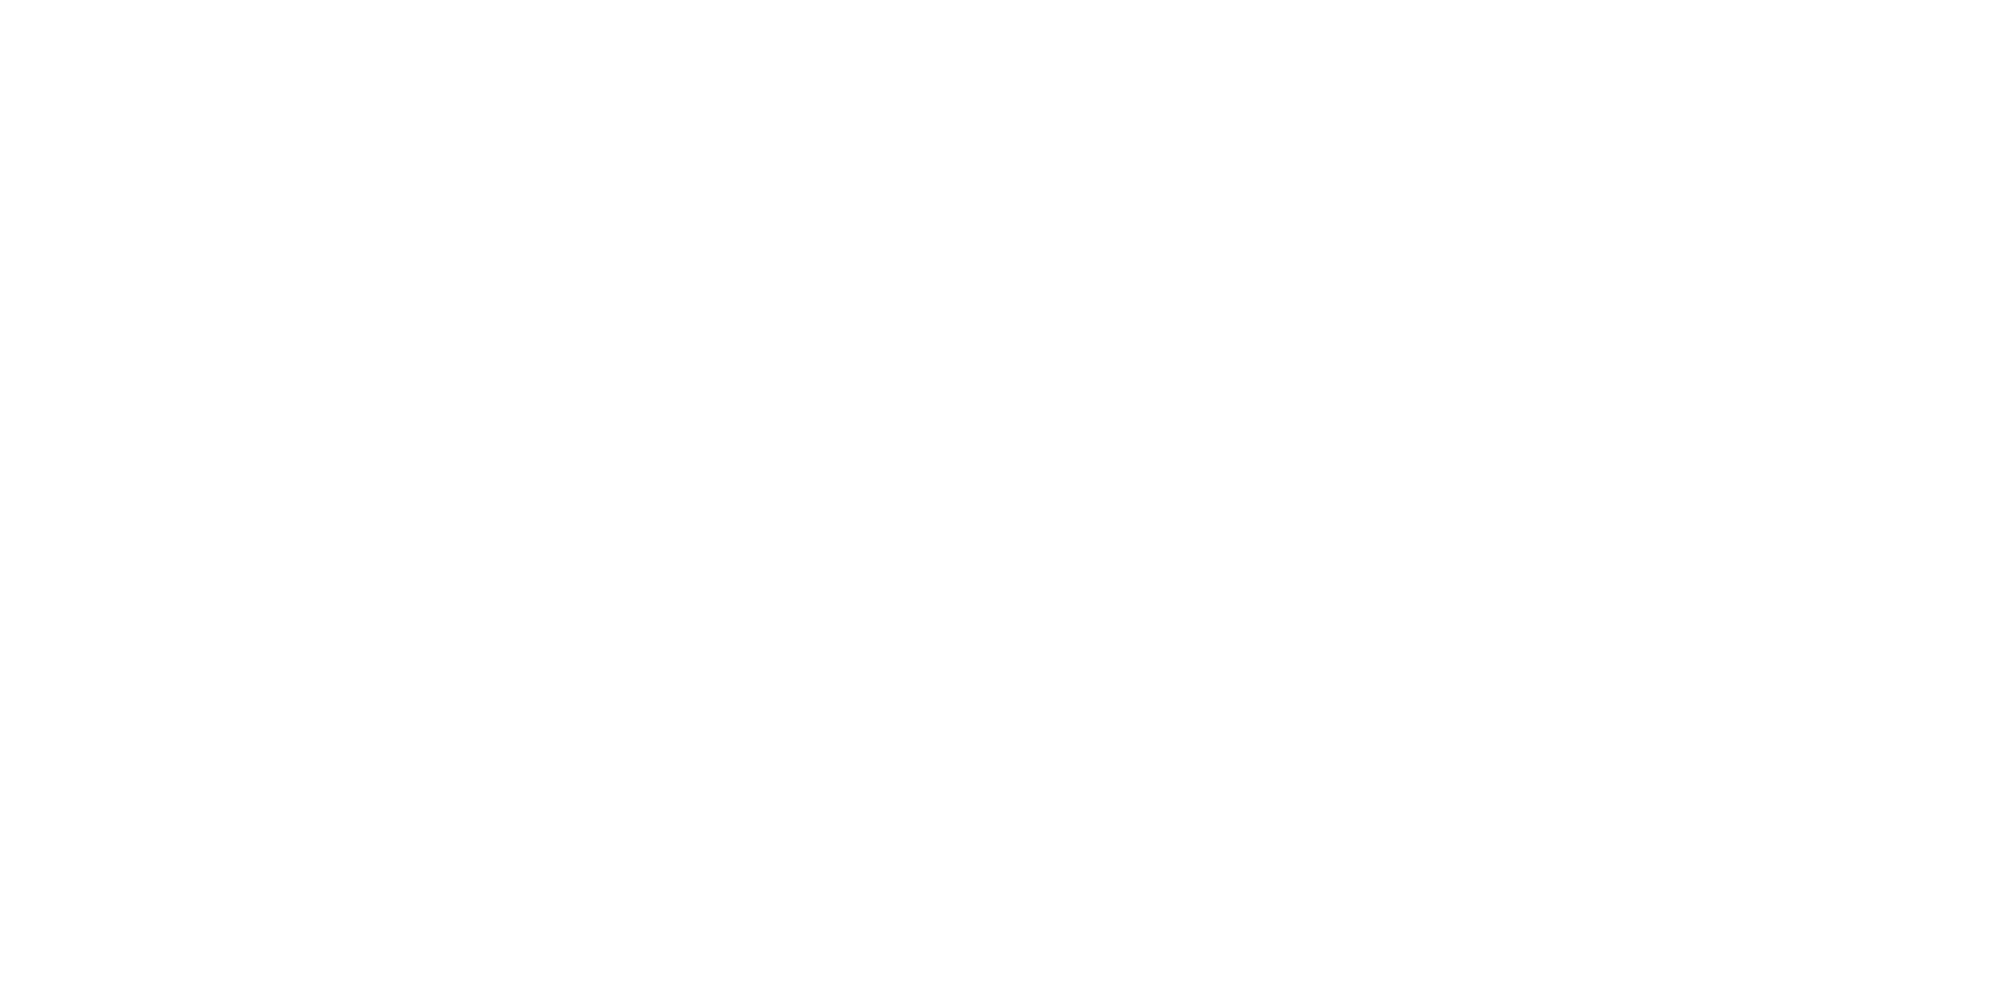

In [9]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for j in data_noise_on:
    plt.plot(rf_freq, data_noise_on[j])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise On Power Spectra of North Celestial Pole', fontsize=15)
plt.legend()

## Calibration

<IPython.core.display.Javascript object>


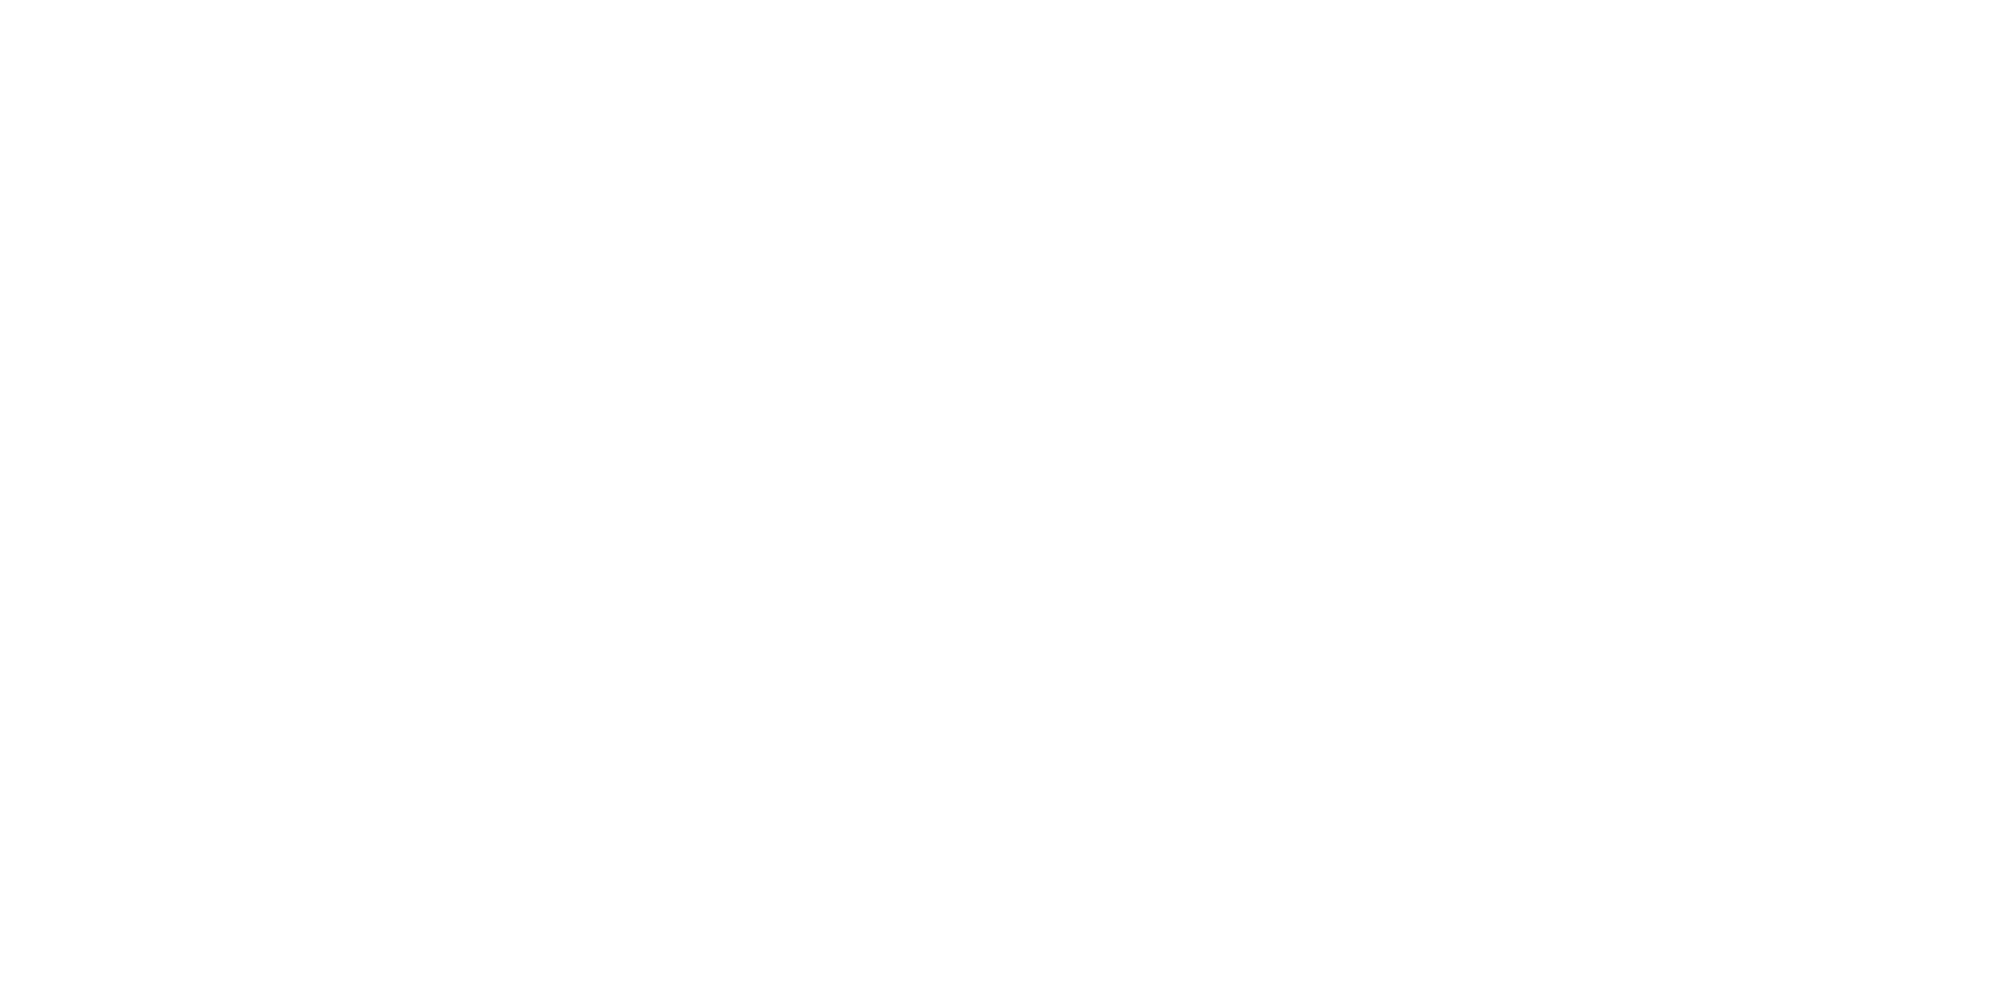

100%|██████████| 474/474 [00:03<00:00, 135.62it/s]


In [10]:
t_noise = 90
t_sys = 2.5

%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off', fontsize=15)

for i in tqdm.tqdm(data_noise_off):
    
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) 
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line), label='ON') #off

    plt.plot(rf_freq, g*fit, "r")

<IPython.core.display.Javascript object>


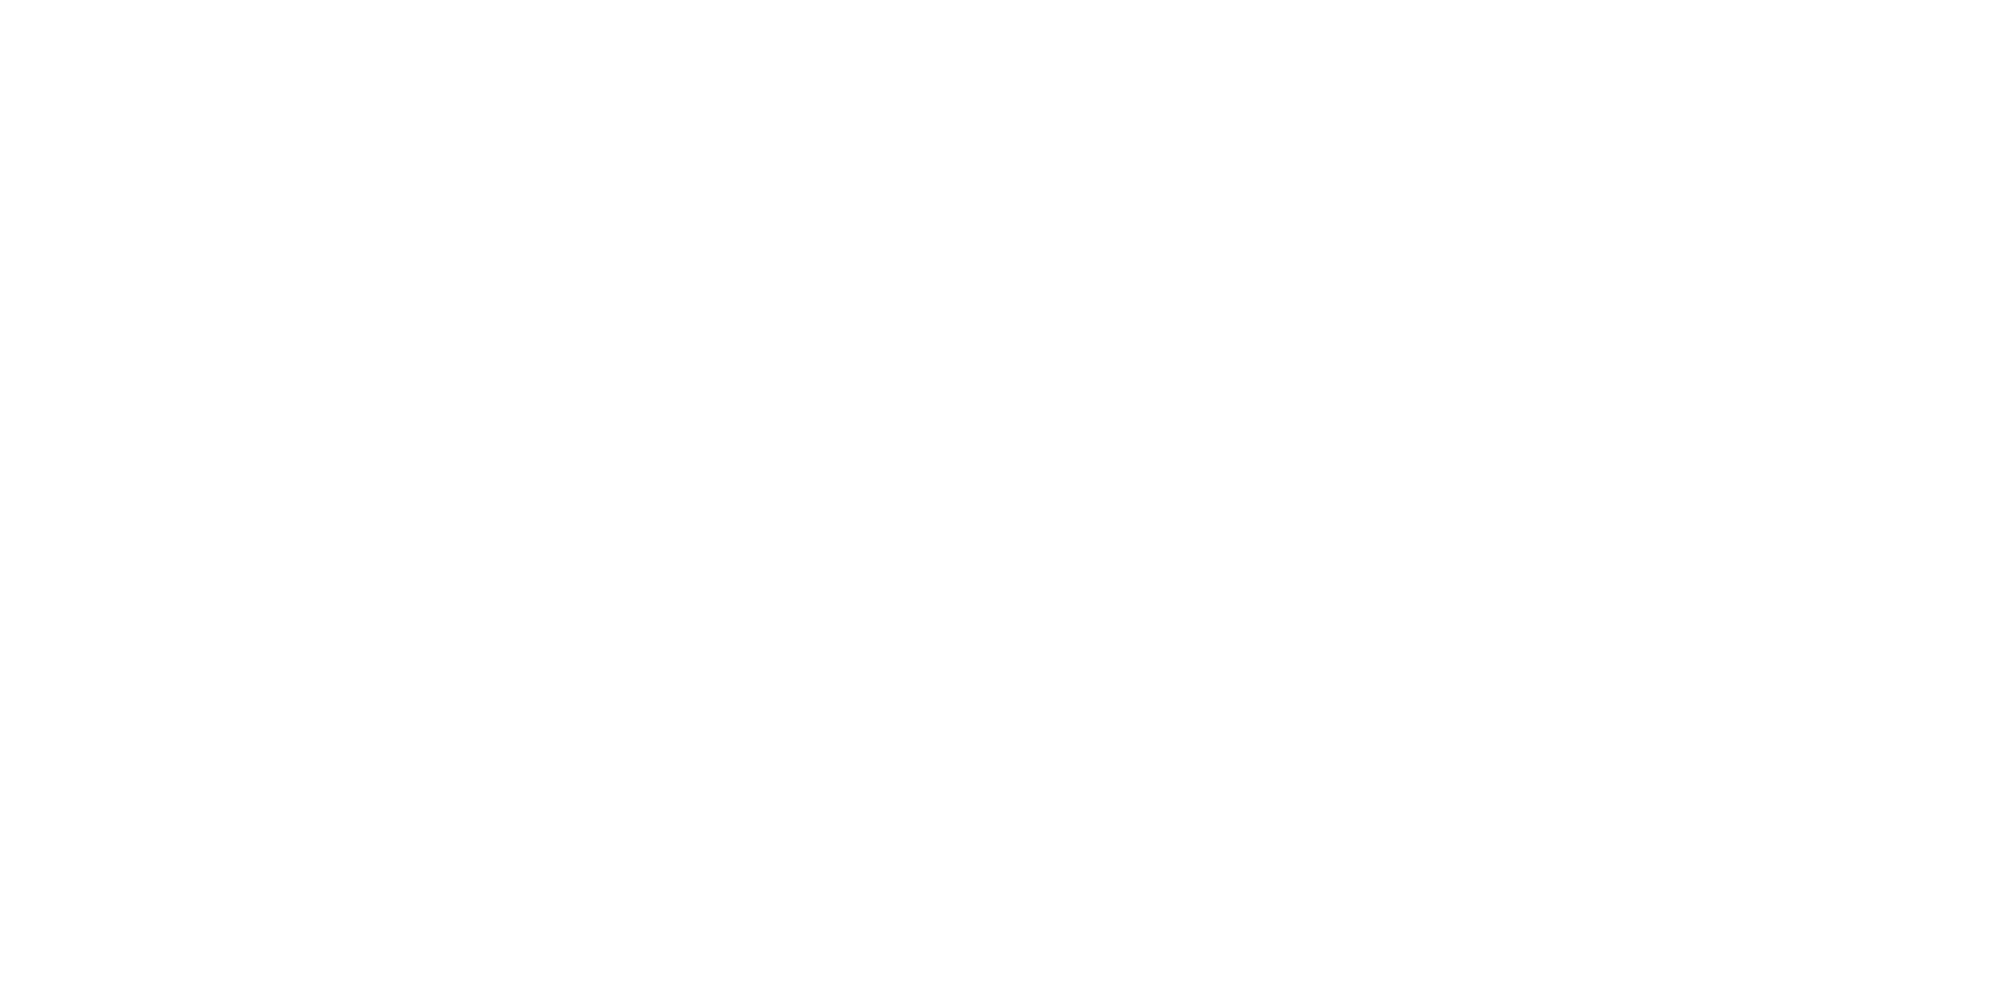

100%|██████████| 474/474 [00:02<00:00, 212.75it/s]


In [11]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

calibrated_noise_off_spectra = []
for i in tqdm.tqdm(data_noise_off):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line - fit), label='ON') #off
    
    calibrated_noise_off_spectra.append(g*(s_line - fit))

<IPython.core.display.Javascript object>


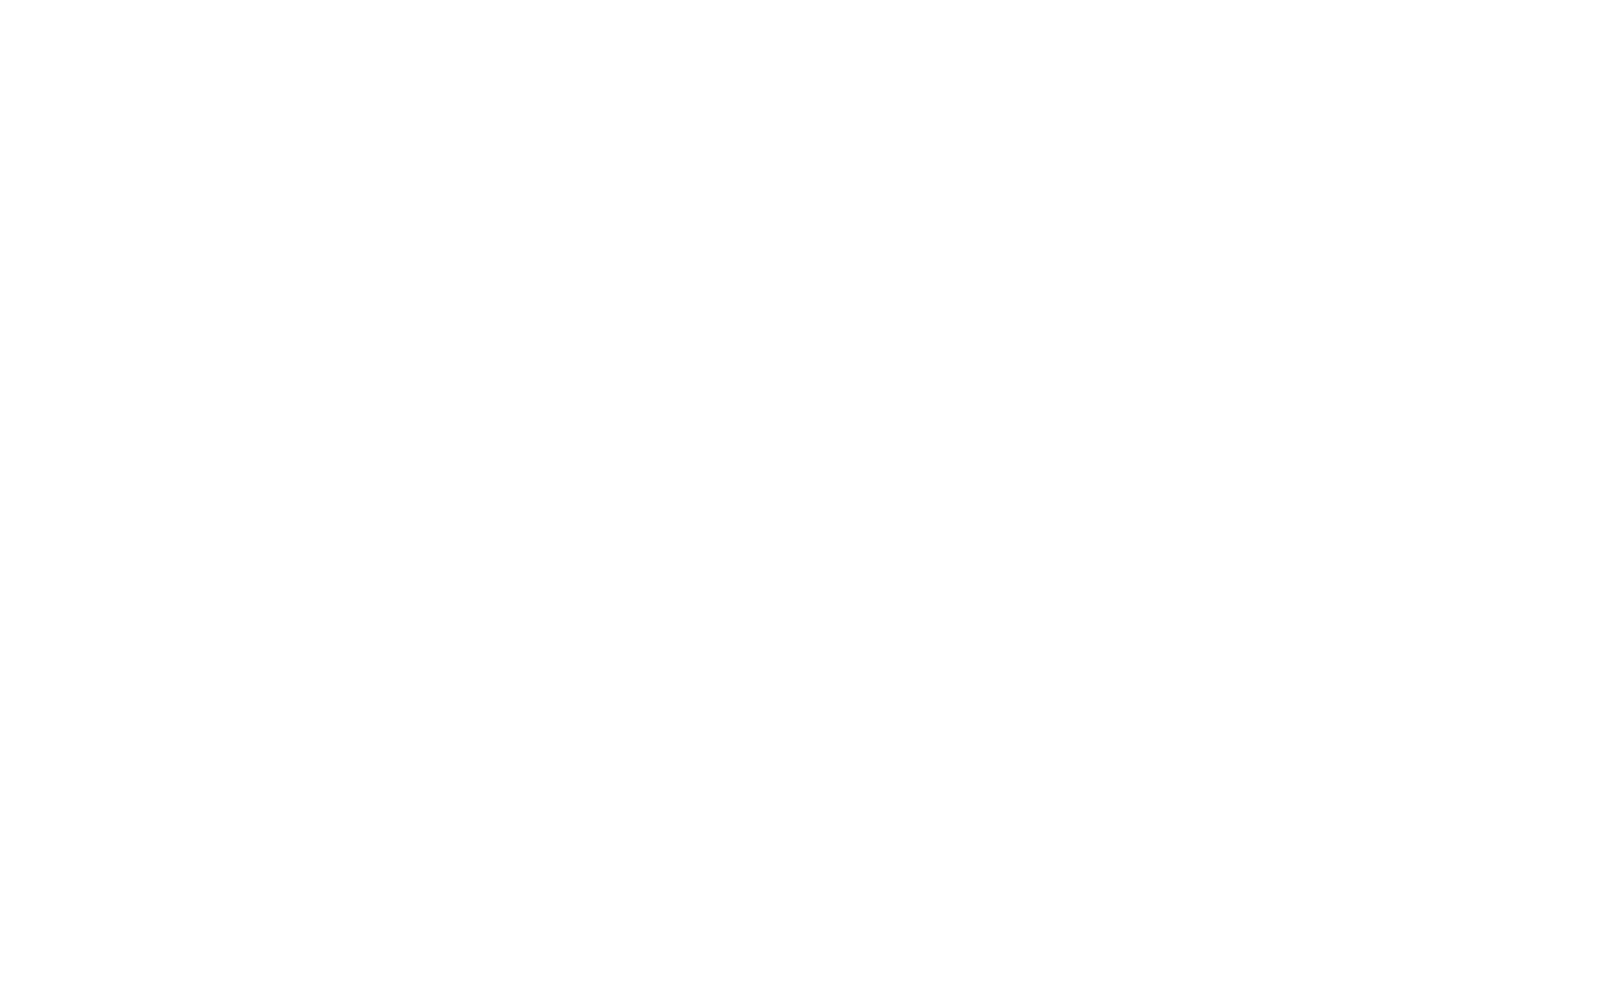

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
/Users/madeline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poo

In [12]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

calibrated_noise_off_spectra = []
for i in (data_noise_off):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000]))
    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]
    filt_freq = rf_freq[index]
    filt_power = s_line[index]
    ind_left = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4270]))[0] 
    ind_right = np.where((rf_freq > rf_freq[4470]) & (rf_freq < rf_freq[4650]))[0]
    inds = np.hstack([ind_left, ind_right])
    
    p = np.polyfit(rf_freq[inds], s_line[inds], 7)
    
    fit = np.polyval(p, rf_freq[index])
    
    plt.axvline(rf_freq[4270], color='dodgerblue')
    plt.axvline(rf_freq[4470], color='dodgerblue')
    
    plt.plot(rf_freq[index], g*(s_line[index] - fit)) #off
    calibrated_noise_off_spectra.append(g*(s_line[index] - fit))

<IPython.core.display.Javascript object>


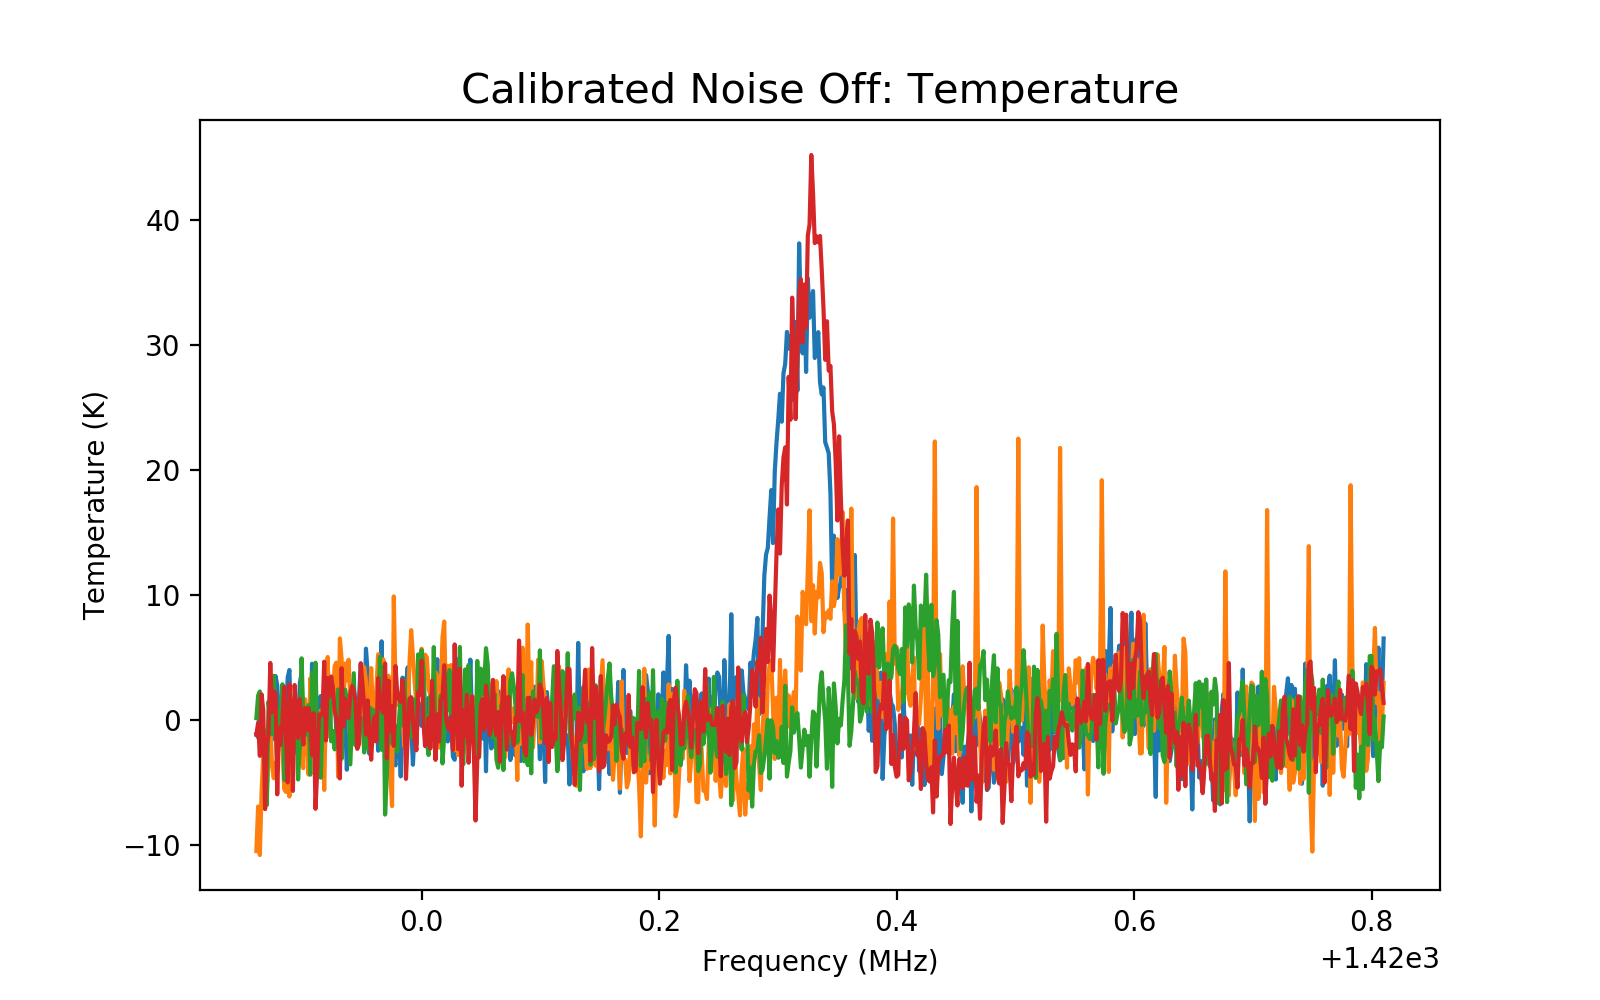

In [32]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

for i in range(0,200,50):
    plt.plot(rf_freq[index], calibrated_noise_off_spectra[i])

## Gaussian fit

In [13]:
calibrated_off = {}
for i in tqdm.tqdm(data_noise_off):
    for filename in files_off:
        d_off = fits.open(filename)
        header = dict(d_off[0].header)
        calibrated_off[(int(header['L']), int(header['B']))] = calibrated_noise_off_spectra

100%|██████████| 474/474 [07:12<00:00,  1.01s/it]


In [ ]:
data_pls = []
for i in calibrated_off:
    

In [53]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Gauss Fit to Data', fontsize=15)

gauss_fit = []
freq_cal = rf_freq[4000:4650]
for i in range(0,len(calibrated_noise_off_spectra)):
    spectra = calibrated_noise_off_spectra[i]
    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]
    amp2 = np.max(spectra)
    avg2 = freq_cal[list(spectra).index(np.max(spectra))]
    sig2 = rf_freq[4470]-rf_freq[4270]
    d = {'amp' : amp2, 'avg':avg2, 'sig': sig2}
    gauss_fit = ugradio.gauss.gaussfit(rf_freq[index], spectra, **d)
    gauss_val = ugradio.gauss.gaussval(rf_freq[index], **gauss_fit)
    
    plt.axvline(rf_freq[4270], color='dodgerblue')
    plt.axvline(rf_freq[4470], color='dodgerblue')
    
    plt.plot(rf_freq[index], spectra, label='Data')
    plt.plot(rf_freq[index], gauss_val, 'r', label='Fit')

<IPython.core.display.Javascript object>

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [51]:
ugradio.gauss.gaussfit??